In [ ]:
import os, pathlib
os.chdir("/Users/gregcc/Documents/GitHub/SURP25/Microlensing")  

In [2]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from ML import TwoLens1S
from ML import ThreeLens1S
from ML import OneL1S

In [ ]:
def read_dic(data, lenses):
    """
    """
    if lenses == 1:
        keys = ["t0", "tE", "rho", "u0"]

    if lenses == 2:
        keys = ["t0", "tE", "rho", "u0", "q", "s", "alpha", "BJD"]

    if lenses == 3:
        keys == ["t0", "tE", "rho", "u0", "q2", "q3", "s2", "s3", "alpha", "psi"]

    else:
        raise ValueError("Error")
    
    return {k: data[k] for k in keys if k in data}

In [ ]:
def centroid_shift_1l(data):
    """
    """
    args = {
        "t0": data["t0"],
        "tE": data ["tE"],
        "rho": data ["rho"],
        "u0_list": data.get("u0_list", data["u0"]),

    }

    single_model = OneL1S(**args)
    one_system = single_model.systems[0]
    dx = one_system['cent_x_hr'] - one_system['x_src_hr']
    dy = one_system['cent_y_hr'] - one_system['y_src_hr']

    return single_model, one_system, dx, dy

In [ ]:
def centroid_shifts_2l(data):
    """
    """
    args = {
        "t0": data["t0"],
        "tE": data["tE"],
        "rho": data["rho"],
        "u0_list": data.get("u0_list", data["u0"]),   # accepts either name
        "q": data.get("q", data["q2"]),               # q or q2
        "s": data.get("s", data["s2"]),               # s or s2
        "alpha": data("alpha"),                   # alpha
        "t_lc": data.get("BJD", data.get("t_lc")),    # accept BJD or t_lc
    }

    double_model = TwoLens1S(**args)
    two_system = double_model.systems[0]
    delta_x = two_system['cent_x_hr'] - two_system['x_src_hr']
    delta_y = two_system['cent_y_hr'] - two_system['y_src_hr']
    return double_model, two_system, delta_x, delta_y



In [ ]:
def centroid_shifts_3l(data):
    """
    """
    secnum = 45
    basenum = 2

    args = {
        "t0": data["t0"],
        "tE": data["tE"],
        "rho": data["rho"],
        "u0_list": data.get("u0_list", data["u0"]),
        "q2": data["q2"],
        "q3": data["q3"],
        "s2": data["s2"],
        "s3": data["s3"],
        "alpha_deg": data["alpha"],   
        "psi_deg": data.get["psi"],       
        "rs": data.get["rs"],          
        "secnum": secnum,
        "basenum": basenum,
        "num_points": len(data.get("BJD", data.get("t_lc", []))),
    }

    triple_model = ThreeLens1S(**args)
    triple_system = triple_model.systems[0]
    delta_x_three = triple_system['cent_x_hr'] - triple_system['x_src_hr']
    delta_y_three = triple_system['cent_y_hr'] - triple_system['y_src_hr']
    return triple_model, triple_system, delta_x_three, delta_y_three


# Integrating Limb-Darkening Effect

In [9]:
import VBMicrolensing

# Initialize VBMicrolensing() class object
VBM = VBMicrolensing.VBMicrolensing()
#Set relative accuracy
VBM.RelTol = 1e-03
#Set accuracy
VBM.Tol=1e-03

VBM.astrometry = True

In [10]:
VBM.a1 = 0.51  # Linear limb darkening coefficient.

s = 0.8 #separation between the two lenses
q = 0.1 # mass ratio
y1 = 0.01 # y1 is the source coordinate along the axis parallel to the line joining the two lenses 
y2 = 0.01 # y2 is the source coordinate orthogonal to the first one
rho = 0.01 # Source radius in Einstein radii

Mag = VBM.BinaryMag2(s, q, y1, y2, rho)  # Call to the BinaryMag2 
print(f"Magnification with limb darkened source = {Mag}")  # Output should be 18.27.....


Magnification with limb darkened source = 18.283639584853585


In [8]:
VBM?

Type:        module
String form: <module 'VBMicrolensing' from '/opt/anaconda3/envs/TheGuide/lib/python3.12/site-packages/VBMicrolensing/__init__.py'>
File:        /opt/anaconda3/envs/TheGuide/lib/python3.12/site-packages/VBMicrolensing/__init__.py
Docstring:   <no docstring>

# Checking Updated Func

In [3]:
from Testing import TwoLens1S

In [4]:
time = np.linspace(-4, 4, 100000)

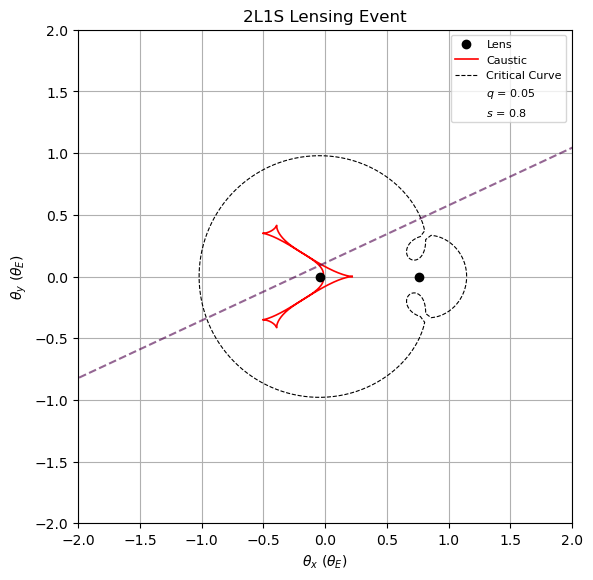

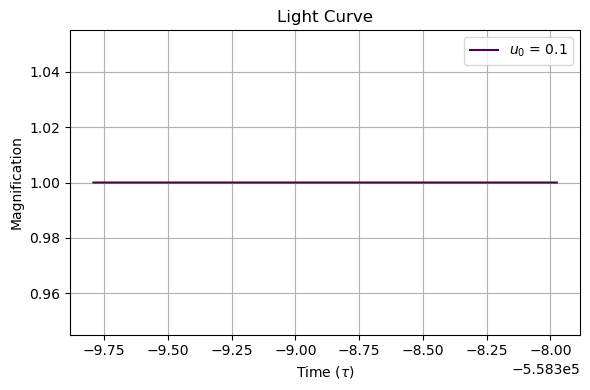

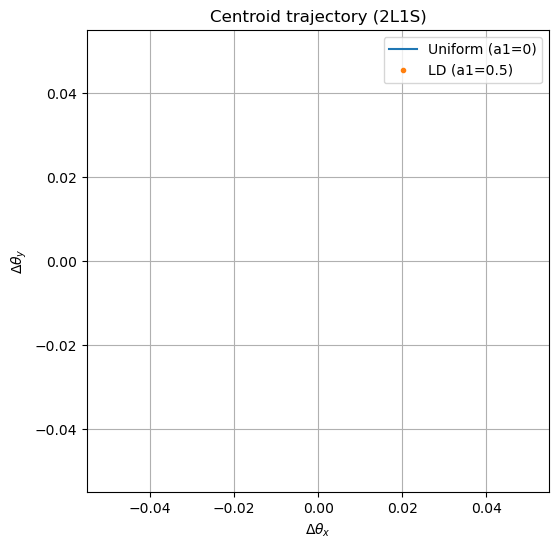

In [5]:
t0      = 2458261.929           # BJD
tE      = 4.40305               # days
rho     = 0.01
u0_list = [0.1]                 # one trajectory for clarity
q       = .05                   # mass ratio
s       = 0.8                   # separation
alpha   = 25.0                  # deg

model_uni = TwoLens1S(t0, tE, rho, u0_list, q, s, alpha, t_lc= time, a1=0.0)     # uniform disk
model_ld  = TwoLens1S(t0, tE, rho, u0_list, q, s, alpha, t_lc= time, a1=0.5)     # limb darkened


sys_u = model_uni.systems[0]
sys_l = model_ld.systems[0]

dx_u = sys_u['cent_x_lc'] - sys_u['x_src_lc']
dy_u = sys_u['cent_y_lc'] - sys_u['y_src_lc']
dx_l = sys_l['cent_x_lc'] - sys_l['x_src_lc']
dy_l = sys_l['cent_y_lc'] - sys_l['y_src_lc']


model_ld.plot_caustic_critical_curves()

model_ld.plot_light_curve()

#centroids
plt.figure(figsize=(6,6))
plt.plot(dx_u, dy_u, label="Uniform (a1=0)")
plt.plot(dx_l, dy_l, ".", label="LD (a1=0.5)")
plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel(r"$\Delta\theta_x$"); plt.ylabel(r"$\Delta\theta_y$")
plt.title("Centroid trajectory (2L1S)")
plt.grid(True); plt.legend()
plt.show()

   uniform  finite:       0 / 100000   dx[min,max]=-4.268e-03, 3.417e-03   dy[min,max]=-2.414e-03, 5.677e-03
        LD  finite:       0 / 100000   dx[min,max]=-4.695e-03, 5.060e+05   dy[min,max]=-4.812e-03, 2.360e+05

Inspecting a single epoch at tau=0 …
source (tau≈0):   (-505998.9075, -235951.0552)
centroid uniform: (nan, nan)
centroid LD:      (nan, nan)


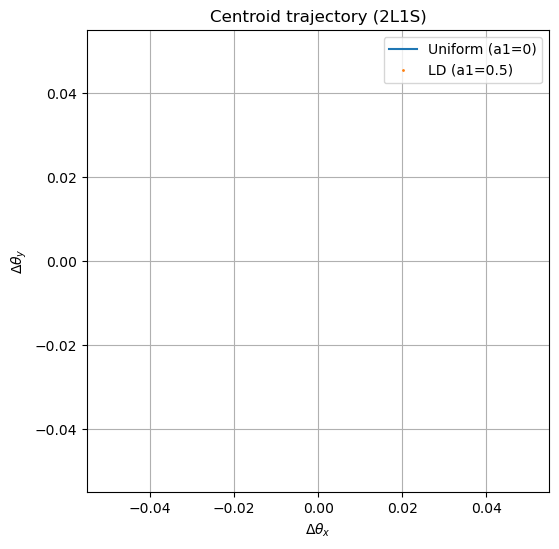

In [6]:
import numpy as np

def stats(name, dx, dy):
    m = np.isfinite(dx) & np.isfinite(dy)
    print(f"{name:>10s}  finite: {m.sum():>7d} / {len(dx)}"
          f"   dx[min,max]={np.nanmin(dx): .3e},{np.nanmax(dx): .3e}"
          f"   dy[min,max]={np.nanmin(dy): .3e},{np.nanmax(dy): .3e}")
    return m

m_u = stats("uniform", dx_u, dy_u)
m_l = stats("LD",      dx_l, dy_l)

# If everything is NaN, stop and inspect one epoch at tau=0:
if m_u.sum() == 0 or m_l.sum() == 0:
    print("\nInspecting a single epoch at tau=0 …")
    i0 = np.argmin(np.abs(model_uni.tau_lc))          # index closest to tau=0
    x_s, y_s = sys_u['x_src_lc'][i0], sys_u['y_src_lc'][i0]
    cx_u, cy_u = sys_u['cent_x_lc'][i0], sys_u['cent_y_lc'][i0]
    cx_l, cy_l = sys_l['cent_x_lc'][i0], sys_l['cent_y_lc'][i0]
    print(f"source (tau≈0):   ({x_s:.4f}, {y_s:.4f})")
    print(f"centroid uniform: ({cx_u:.4f}, {cy_u:.4f})")
    print(f"centroid LD:      ({cx_l:.4f}, {cy_l:.4f})")

# Replot only finite points (and add markers so something shows even if tiny)
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(dx_u[m_u], dy_u[m_u], '-', lw=1.5, label="Uniform (a1=0)")
plt.plot(dx_l[m_l], dy_l[m_l], '.', ms=2, label="LD (a1=0.5)")
plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel(r"$\Delta\theta_x$"); plt.ylabel(r"$\Delta\theta_y$")
plt.title("Centroid trajectory (2L1S)")
plt.grid(True); plt.legend()
plt.show()


In [8]:
t0      = 2458261.929           # BJD
tE      = 4.40305               # days
rho     = 0.01
u0_list = [0.1]                 # one trajectory for clarity
q       = 0.00095                  # mass ratio
s       = 1.3                  # separation
alpha   = 25.0                  # deg               # deg

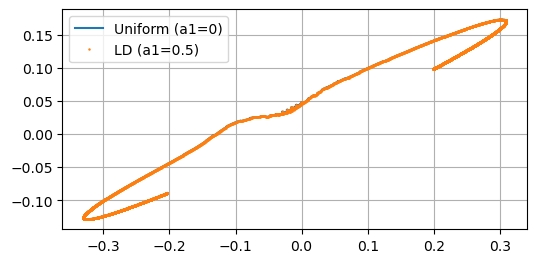

In [9]:
tau     = np.linspace(-4, 4, 10000)      #tau
time    = t0 + tau * tE                  #converting it to BJD

model_uni = TwoLens1S(t0, tE, rho, u0_list, q, s, alpha, t_lc=time, a1=0.0)
model_ld  = TwoLens1S(t0, tE, rho, u0_list, q, s, alpha, t_lc=time, a1=0.5)

sys_u = model_uni.systems[0]
sys_l = model_ld.systems[0]

dx_u = sys_u['cent_x_lc'] - sys_u['x_src_lc']
dy_u = sys_u['cent_y_lc'] - sys_u['y_src_lc']
dx_l = sys_l['cent_x_lc'] - sys_l['x_src_lc']
dy_l = sys_l['cent_y_lc'] - sys_l['y_src_lc']

plt.figure(figsize=(6,6))
plt.plot(dx_u, dy_u, label="Uniform (a1=0)")
plt.plot(dx_l, dy_l, ".", ms=1.5, label="LD (a1=0.5)")
plt.gca().set_aspect("equal", adjustable="box")
plt.grid(True); plt.legend(); plt.show()